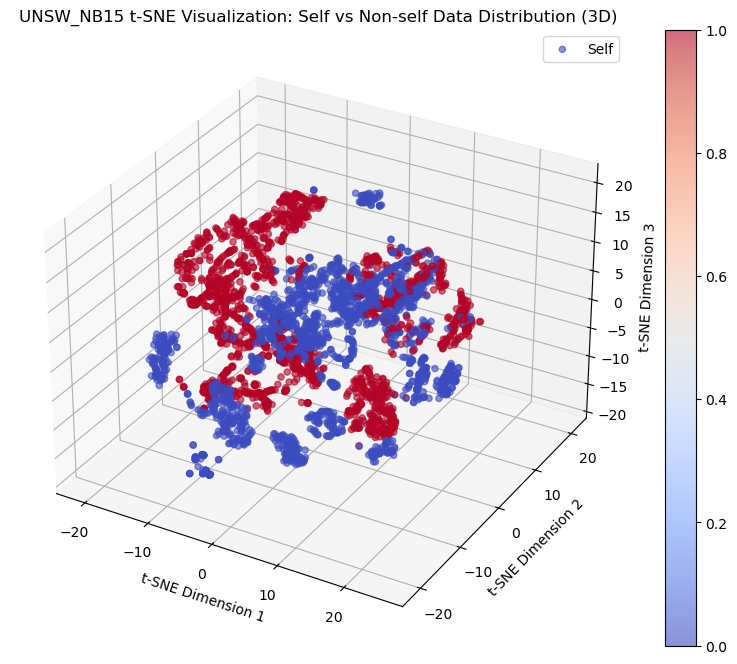

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

path = 'UNSW_NB15'
train_self = pd.read_csv(path + '/check/self/train_self.csv')
train_nonself = pd.read_csv(path + '/check/nonself/train_nonself.csv')
test_self = pd.read_csv(path + '/check/self/test_self.csv')
test_nonself = pd.read_csv(path + '/check/nonself/test_nonself.csv')

self = pd.concat([train_self, test_self], axis=0)
self = self.sample(n=2000, random_state=42)
self = self.fillna(self.mean())
nonself = pd.concat([train_nonself, test_nonself], axis=0)
nonself = nonself.sample(n=2000, random_state=42)
nonself = nonself.fillna(nonself.mean())

# 合并数据并添加标签
data = pd.concat([self, nonself], axis=0)
labels = np.array([0] * len(self) + [1] * len(nonself))

# 使用t-SNE进行降维到3维
tsne = TSNE(n_components=3, random_state=42)
data_tsne = tsne.fit_transform(data)

# 绘制3D散点图
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(data_tsne[:, 0], data_tsne[:, 1], data_tsne[:, 2], 
                    c=labels, cmap='coolwarm', alpha=0.6)
plt.colorbar(scatter)
plt.title(f'{path} t-SNE Visualization: Self vs Non-self Data Distribution (3D)')
ax.set_xlabel('t-SNE Dimension 1')
ax.set_ylabel('t-SNE Dimension 2')
ax.set_zlabel('t-SNE Dimension 3')
ax.legend(['Self', 'Non-self'])
plt.savefig(path + '/tsne_3d.png')
plt.show()